# Generalized Linear Model

In [1]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

import sys
# !{sys.executable} -m pip install seaborn

In [2]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

pd.set_option("display.max_columns", 101)
pd.set_option('display.max_colwidth', 100)

## Data Description

Column | Description
:---|:---
`feat_0` | Feature 0
`feat_1` | Feature 1
`feat_2` | Feature 2
`feat_3` | Feature 3
`feat_4` | Feature 4
`feat_5` | Feature 5
`feat_6` | Feature 6
`label`  | Label

In [3]:
# The information dataset for the training set is already loaded below
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
display(test_data.head())
display(data.head())

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6
0,637.0,21.01388,11.397420,15.15302,63.10153,4.172242,65.026667
1,17.0,55.93220,0.000000,12.75600,48.85596,6.406862,49.263158
2,420.0,57.00249,23.480660,14.00443,52.15526,4.382061,31.913043
3,889.0,69.00829,63.439070,15.01983,63.04099,3.748330,12.981998
4,154.0,23.35644,6.617647,13.59359,49.51303,4.638098,52.983240


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,label
0,355.0,34.39730,15.91837,14.70646,59.15732,4.445207,50.009913,0.560099
1,40.0,17.36507,13.63636,16.08324,59.50397,5.267598,83.260870,0.782609
2,234.0,32.64324,28.83436,14.59559,60.56992,5.482922,51.019264,0.590193
3,178.0,11.90953,11.11111,14.38939,58.33411,4.165093,64.935428,0.689354
4,57.0,36.88889,43.58974,13.90568,63.15364,4.324902,16.307692,0.123077


In [4]:
data.shape

(284, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feat_0  284 non-null    float64
 1   feat_1  284 non-null    float64
 2   feat_2  284 non-null    float64
 3   feat_3  284 non-null    float64
 4   feat_4  284 non-null    float64
 5   feat_5  284 non-null    float64
 6   feat_6  284 non-null    float64
 7   label   284 non-null    float64
dtypes: float64(8)
memory usage: 17.9 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
feat_0,284.0,529.566901,1824.470272,14.000000,102.250000,208.500000,539.750000,29528.000000
feat_1,284.0,41.275230,20.792467,0.000000,26.108403,40.220760,55.917717,92.334500
feat_2,284.0,14.641262,12.473012,0.000000,6.309335,11.061885,18.974745,80.174930
feat_3,284.0,14.254616,1.891007,8.420029,13.065952,14.432805,15.504932,20.545740
feat_4,284.0,58.537138,5.224421,39.728350,55.261265,58.587440,62.149482,80.565040
feat_5,284.0,4.316309,0.592278,2.908312,3.933435,4.202048,4.511645,6.913397
feat_6,284.0,44.590390,19.353291,4.575758,30.137170,43.275803,56.974431,95.002823
label,284.0,0.439108,0.186568,0.075758,0.296944,0.431043,0.553604,0.928302


<Axes: >

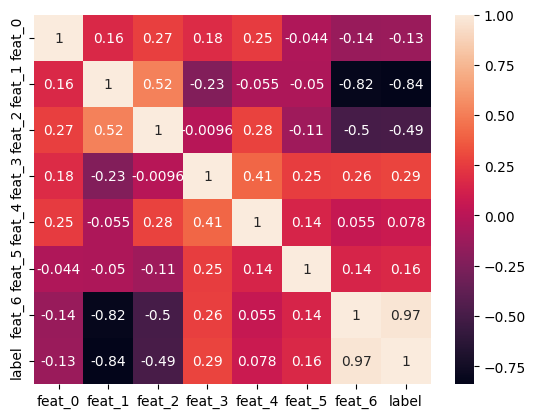

In [7]:

sns.heatmap(data.corr(), annot=True)

Looks good. There are not much strong correlation

## Machine Learning

Build a GLM that can predict the label.
- **The model's performance will be evaluated on the basis of R-squared.**

In [8]:
features = data.columns[data.columns != 'label']
X_train = data[features]
y_train = data['label']
display(X_train.head())

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6
0,355.0,34.39730,15.91837,14.70646,59.15732,4.445207,50.009913
1,40.0,17.36507,13.63636,16.08324,59.50397,5.267598,83.260870
2,234.0,32.64324,28.83436,14.59559,60.56992,5.482922,51.019264
3,178.0,11.90953,11.11111,14.38939,58.33411,4.165093,64.935428
4,57.0,36.88889,43.58974,13.90568,63.15364,4.324902,16.307692


In [9]:
# Add a constant to the model - intercept
X_train = sm.add_constant(X_train)

In [10]:
## Create GLM model
glm = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

In [11]:
result = glm.fit()

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:                  284
Model:                            GLM   Df Residuals:                      276
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                       0.0018495
Method:                          IRLS   Log-Likelihood:                 494.66
Date:                Tue, 11 Mar 2025   Deviance:                      0.51047
Time:                        19:47:19   Pearson chi2:                    0.510
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0516      0.038      1.366      0.172      -0.022       0.126
feat_0       8.23e-07   1.51e-06      0.547      0.585   -2.13e-06    3.77e-06
feat_1        -0.0014      0.000     -6.219      0.000      -0.002      -0.001
feat_2      8.495e-05      0.000      0.320      0.749      -0.000       0.001
feat_3         0.0018      0.002      1.165      0.244      -0.001       0.005
feat_4         0.0003      0.001      0.487      0.626      -0.001       0.001
feat_5         0.0092      0.005      2.012      0.044       0.000       0.018
feat_6         0.0081      0.000     34.213      0.000       0.008       0.009
==============================================================================
"""

Results look good

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    Submit a CSV file with a header row plus each of the test entries, each on its own line. 

The file (`submissions.csv`) should have exactly 1 column:

Column | Description
:---|:---
`label`  | Label

In [13]:
test = pd.read_csv('test.csv')
test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6
0,637.0,21.01388,11.397420,15.15302,63.10153,4.172242,65.026667
1,17.0,55.93220,0.000000,12.75600,48.85596,6.406862,49.263158
2,420.0,57.00249,23.480660,14.00443,52.15526,4.382061,31.913043
3,889.0,69.00829,63.439070,15.01983,63.04099,3.748330,12.981998
4,154.0,23.35644,6.617647,13.59359,49.51303,4.638098,52.983240


In [14]:
X_test = test[features]
X_test = sm.add_constant(X_test)
display(X_test.head(3))

,const,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6
0,1.0,637.0,21.01388,11.39742,15.15302,63.10153,4.172242,65.026667
1,1.0,17.0,55.93220,0.00000,12.75600,48.85596,6.406862,49.263158
2,1.0,420.0,57.00249,23.48066,14.00443,52.15526,4.382061,31.913043


In [15]:
## Make prediction
predictions = result.predict(X_test)

# submission datafreame
submission_df = pd.DataFrame({
    'label': predictions
})
submission_df

,label
0,0.633629
1,0.468693
2,0.313968
3,0.147339
4,0.529875
5,0.511100
6,0.529470
7,0.382629
8,0.442528
9,0.374915


In [16]:
#Submission
submission_df.to_csv('submissions.csv', index=False)

In [17]:
submission_df

,label
0,0.633629
1,0.468693
2,0.313968
3,0.147339
4,0.529875
5,0.511100
6,0.529470
7,0.382629
8,0.442528
9,0.374915
